In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# metrics for accuracy
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
#visualizing tool
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#selecting best features from data
from sklearn.feature_selection import SelectKBest, f_classif
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv(r"C:\Users\HP\Documents\ML, AI and DL\disease_train_data.csv")

In [3]:
test_data=pd.read_csv(r"C:\Users\HP\Documents\ML, AI and DL\disease_test_data.csv")

In [4]:
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Non-diseased
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diseased
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Diseased
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Diseased
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Diseased


In [5]:
test_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Diseased
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diseased
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Diseased
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diseased
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Diseased


In [6]:
train_data.shape

(2351, 25)

In [7]:
test_data.shape

(486, 25)

In [8]:
#information on the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [10]:
#checking missing values
train_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [11]:
test_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [12]:
#unique categorical values
train_data['Disease'].unique()

array(['Non-diseased', 'Diseased'], dtype=object)

In [13]:
test_data['Disease'].unique()

array(['Diseased', 'Non-diseased'], dtype=object)

In [14]:
#count of categorical values
train_data['Disease'].value_counts()

Diseased        1795
Non-diseased     556
Name: Disease, dtype: int64

In [15]:
test_data['Disease'].value_counts()

Diseased        481
Non-diseased      5
Name: Disease, dtype: int64

In [16]:
#import labelEncoder
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder=LabelEncoder()
print(label_encoder)

LabelEncoder()


In [18]:
train_data['Disease']=label_encoder.fit_transform(train_data['Disease'])

In [19]:
test_data['Disease']=label_encoder.fit_transform(test_data['Disease'])

In [20]:
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,1
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,0
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,0
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,0
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,0


In [21]:
test_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,0
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,0
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,0
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,0
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,0


In [22]:
# compare the mean values for both classes in train data
train_data.groupby('Disease').mean()

# A significant difference in the mean of the two class further gives us insight that the Disease condition can be predicted

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Disease,,,,,,,,,,,,,,,,,,,,,
0,0.343195,0.393507,0.589425,0.474112,0.475050,0.464502,0.489195,0.543407,0.519549,0.567995,...,0.359539,0.442197,0.408725,0.532594,0.462707,0.461455,0.602981,0.423617,0.466512,0.431768
1,0.426210,0.394105,0.575743,0.600604,0.627425,0.642466,0.565125,0.326884,0.371175,0.543801,...,0.422262,0.429152,0.463915,0.589613,0.345432,0.422059,0.515342,0.429781,0.416132,0.425595


In [23]:
#showing distribution of training data disease conditions before processing
train_Diseased_df=train_data[train_data['Disease']==0][0:1796]
train_NonDiseased_df=train_data[train_data['Disease']==1][0:557]

In [24]:
train_data.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [25]:
# List of numerical columns to visualize
numerical_columns = ['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein'
       ]

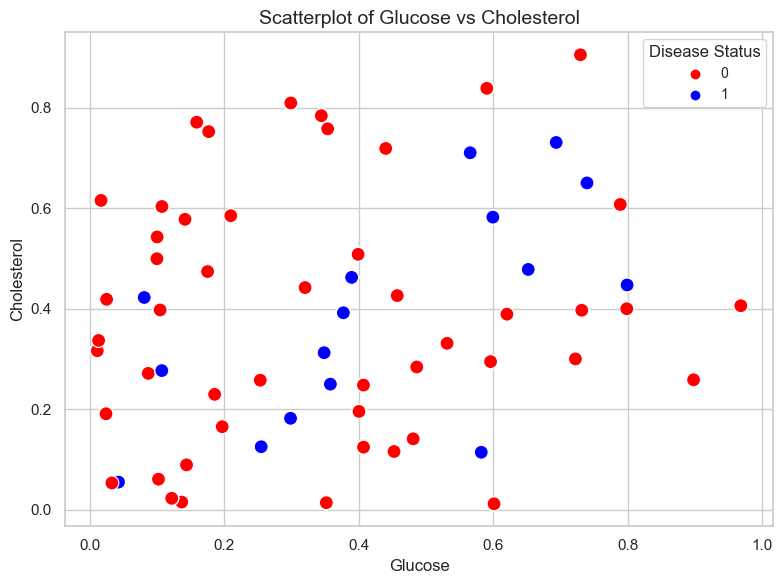

In [26]:
# Scatterplot visualization for 2 of the independent variable
# Set the plot style and palette
sns.set(style="whitegrid")
palette = {0: 'red', 1: 'blue'}  # the classes where 1=disease and 0=non disease based on our data set

# Create the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=train_data,
    x='Glucose',
    y='Cholesterol',
    hue='Disease',
    palette=palette,
    s=100  # Size of the points
)

# Add title and labels
plt.title('Scatterplot of Glucose vs Cholesterol', fontsize=14)
plt.xlabel('Glucose', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)

# Show the legend
plt.legend(title='Disease Status', fontsize=10, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

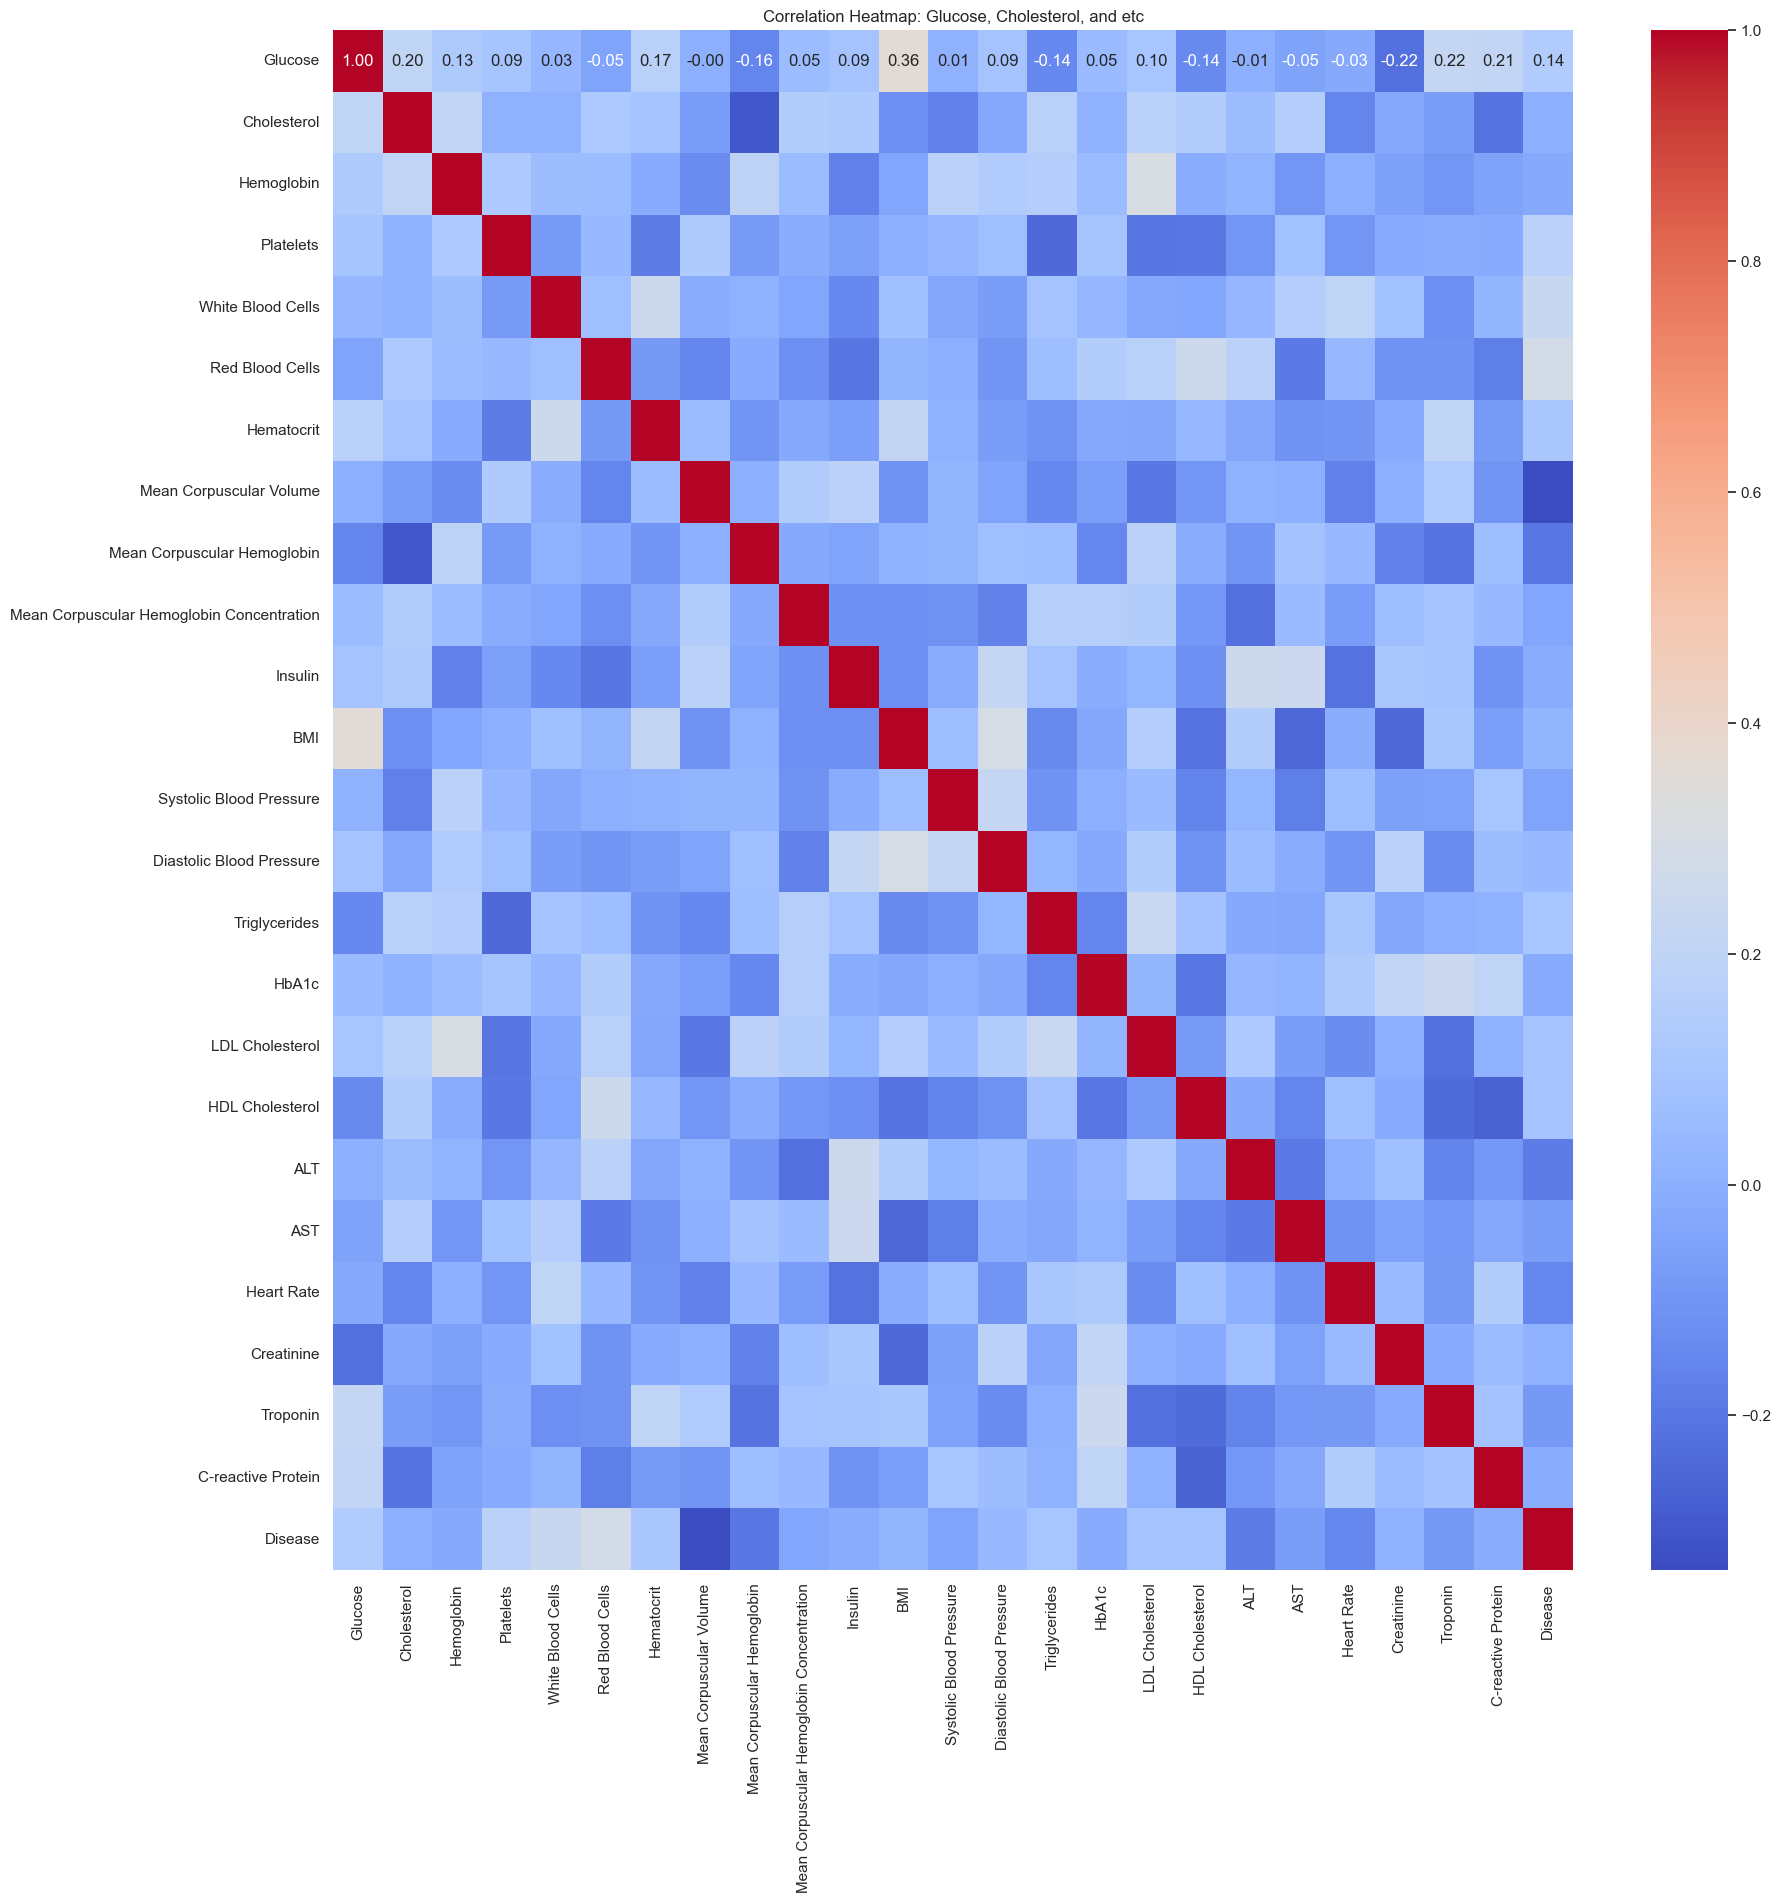

In [27]:
# Compute the correlation matrix
correlation_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Glucose, Cholesterol, and etc')
plt.show()

#columns like mean corposcular volume

In [28]:
# Correcting imbalanced train data through Under-Sampling (building sample dataset containing similar distribution of diseased and non diseased conditions)
train_diseased_data = train_Diseased_df.sample(n=556)
# Concatenating two DataFrames
new_training_diseased_data = pd.concat([train_diseased_data, train_NonDiseased_df], axis=0)
# Print first 5 rows of the new dataset
new_training_diseased_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
1099,0.731786,0.397083,0.829354,0.754841,0.764974,0.555337,0.599033,0.911538,0.866320,0.460602,...,0.652514,0.448466,0.711943,0.621086,0.080494,0.871053,0.383653,0.682164,0.147258,0
1975,0.024837,0.418761,0.626973,0.856957,0.763687,0.523927,0.059236,0.865591,0.289135,0.007903,...,0.531881,0.044196,0.825226,0.404381,0.619854,0.646951,0.308306,0.767154,0.212200,0
1776,0.729868,0.905026,0.520473,0.306955,0.743164,0.667150,0.769573,0.183771,0.246542,0.161920,...,0.188792,0.977656,0.341007,0.797158,0.994460,0.591303,0.425296,0.007490,0.196192,0
1164,0.185553,0.229802,0.609836,0.476448,0.566526,0.869273,0.349787,0.285897,0.919055,0.583470,...,0.151173,0.265703,0.916382,0.593776,0.163161,0.800666,0.678490,0.159601,0.572092,0
953,0.141529,0.577854,0.097310,0.127061,0.227751,0.636459,0.400861,0.613072,0.020861,0.855190,...,0.459586,0.485988,0.125369,0.771416,0.170894,0.352647,0.925924,0.699490,0.251547,0


In [29]:
new_training_diseased_data.shape

(1112, 25)

In [30]:
train_diseased_data.shape

(556, 25)

In [31]:
train_NonDiseased_df.shape

(556, 25)

In [32]:
# Split features (X) and target (y) for training data
X_train = new_training_diseased_data.drop('Disease', axis=1)
y_train = new_training_diseased_data['Disease']

In [33]:
#splitting test data into predictants(X) and target(y)
X_test=test_data.drop(columns='Disease',axis=1)
y_test=test_data['Disease']

In [34]:
# Feature Scaling: Standardize the feature set
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k='all')  # Here we select all features, but you can try selecting top K
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

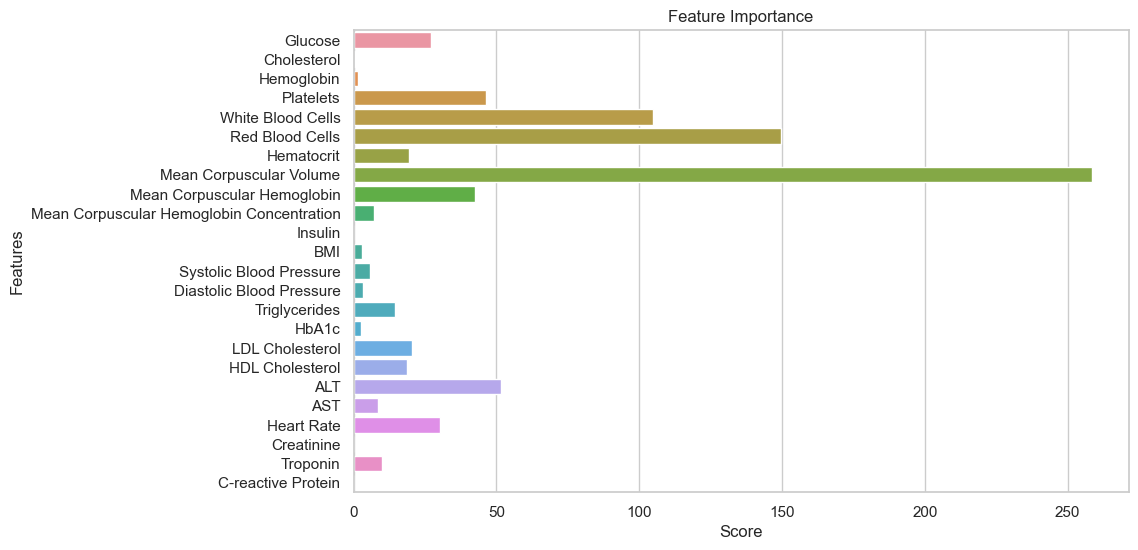

In [37]:
# Visualize feature importance based on SelectKBest
plt.figure(figsize=(10, 6))
sns.barplot(x=selector.scores_, y=X_train.columns, orient='h')
plt.title('Feature Importance')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [38]:
# Model: Support Vector Machine (SVM)
svm = SVC(random_state=42)

In [39]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4]
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best Parameters
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

Best parameters from GridSearchCV:
{'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


In [40]:
# Train the model with the best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = best_svm.predict(X_test_selected)

# Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       481
           1       0.10      0.40      0.16         5

    accuracy                           0.96       486
   macro avg       0.55      0.68      0.57       486
weighted avg       0.98      0.96      0.97       486

Accuracy Score on Test Set: 0.9567901234567902


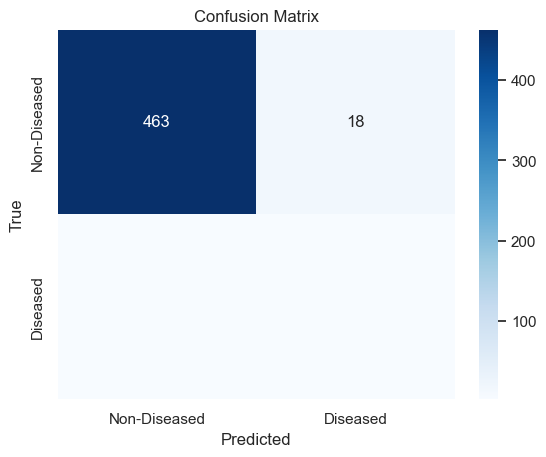

In [41]:
# Confusion Matrix (Optional)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased', 'Diseased'], yticklabels=['Non-Diseased', 'Diseased'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()